# **Predictive Modeling for Rocket Landing Success**  
### *A Machine Learning Approach Using SpaceX Falcon 9 Data* 


## **EDA (Exploratory Data Analysis)**

### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the SpaceX dataset `data_falcon9_V2.csv`

In [2]:
file_path = r"C:\Users\cjchavarria\Desktop\Rocket-Landing-Success-ML\02-data-wrangling\data_falcon9_V2.csv"

In [3]:
df = pd.read_csv( file_path )

In [4]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


#### Analyzing the impact of `FlightNumber` and `PayloadMass` on launch outcomes

In this step, we examine how the `FlightNumber` (indicating the sequence of launches) and `PayloadMass` affect the success of the first stage landing. We hypothesize that:

1. As the flight number increases, SpaceX may have improved its technology and procedures, increasing the likelihood of successful landings.
2. Payload mass may inversely affect the success rate, as heavier payloads could make the landing process more challenging.

To visualize these relationships, we plot `FlightNumber` against `PayloadMass` and overlay the launch outcomes (`Class`).


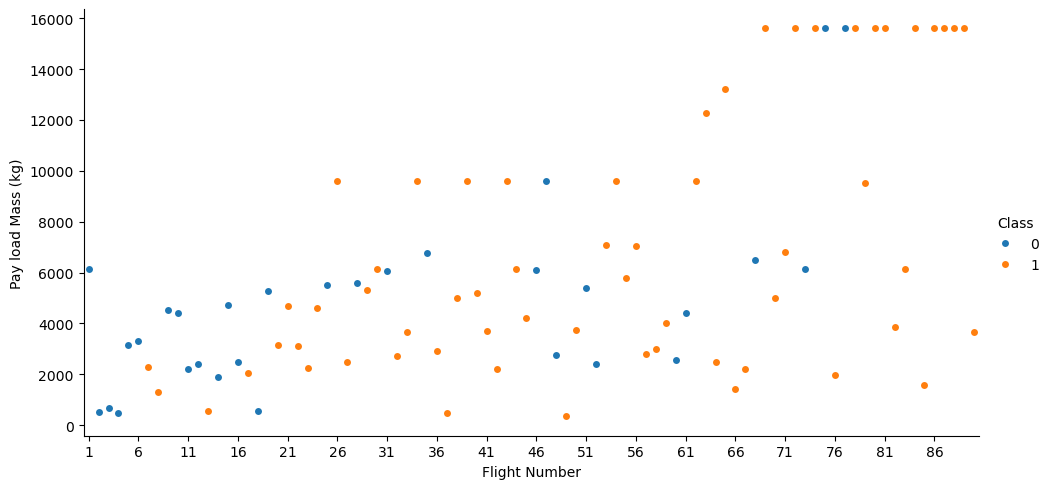

In [5]:
sns.catplot(y = "PayloadMass", x = "FlightNumber", hue = "Class", data = df , aspect = 2)
plt.xlabel("Flight Number", fontsize = 10)
plt.ylabel("Pay load Mass (kg)", fontsize = 10)
# Reduce the density by limiting the number of x-ticks (display every 5th flight number, for example)
plt.xticks(ticks=range(0, len(df['FlightNumber'].unique()), 5))
plt.show()

#### Visualize the relationship between Flight Number and Launch Site

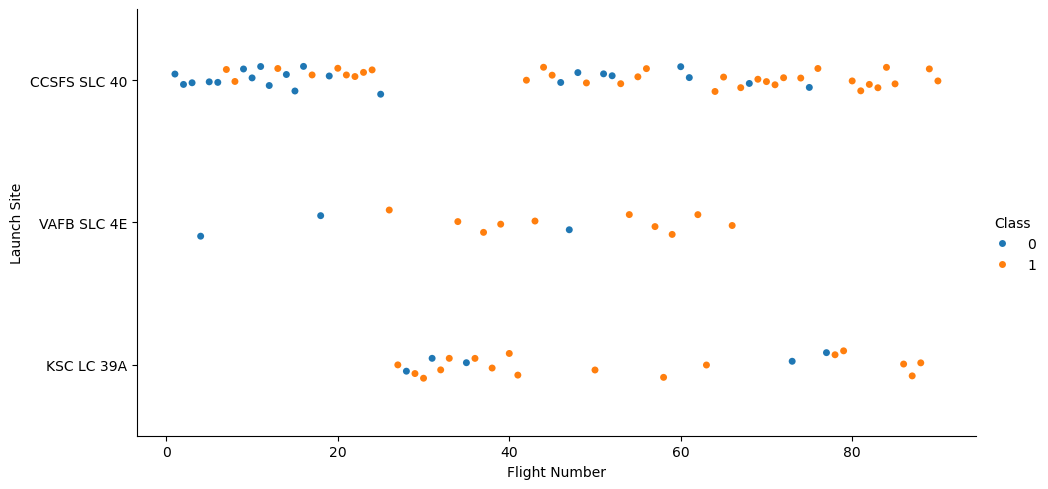

In [6]:
sns.catplot(y = "LaunchSite", x = "FlightNumber", hue = "Class", data = df, aspect = 2)
plt.xlabel("Flight Number", fontsize = 10)
plt.ylabel("Launch Site", fontsize = 10)
plt.show()

#### Visualize the relationship between Payload and Launch Site

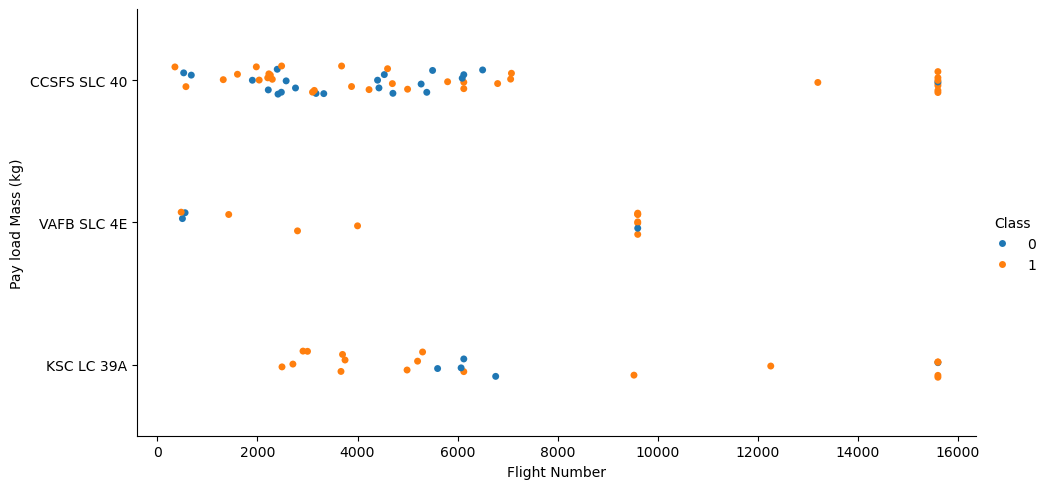

In [7]:
sns.catplot(y = "LaunchSite", x = "PayloadMass", hue = "Class", data = df, aspect = 2)
plt.xlabel("Flight Number", fontsize = 10)
plt.ylabel("Pay load Mass (kg)", fontsize = 10)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

#### Visualize the relationship between success rate of each orbit type

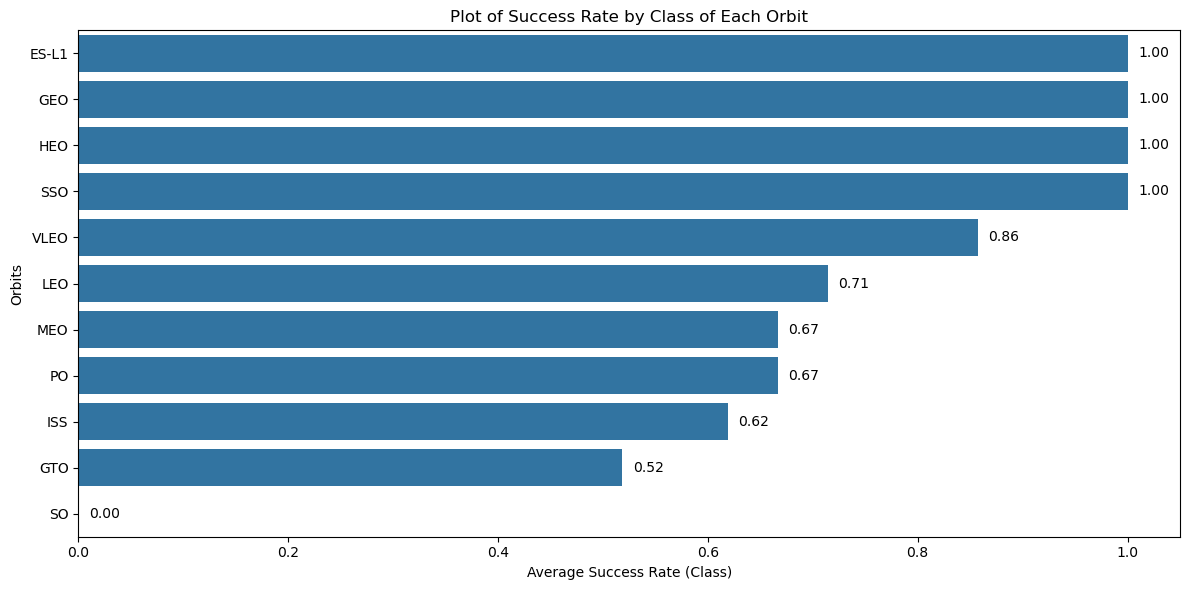

In [8]:
# Group data by 'Orbit' and calculate the mean success rate ('Class') for each orbit
grouped_orbits = df.groupby(by=['Orbit'])['Class'].mean().sort_values(ascending=False).reset_index()

# Create a figure and axis for the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Generate a horizontal bar chart
sns.barplot(x='Class', y='Orbit', data=grouped_orbits, ax=ax, orient='h')

# Add labels to each bar
for p in ax.patches:
    # Get the width of each bar
    width = p.get_width()
    
    # Add the label at the end of each bar
    ax.text(width + 0.01, p.get_y() + p.get_height() / 2, 
            f'{width:.2f}', va='center', ha='left', fontsize=10)

# Set the title and axis labels for the chart
ax.set_title('Plot of Success Rate by Class of Each Orbit', fontdict={'size': 12})
ax.set_xlabel('Average Success Rate (Class)', fontsize=10)
ax.set_ylabel('Orbits', fontsize=10)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()


#### Visualize the relationship between `FlightNumber` and `Orbit Type`

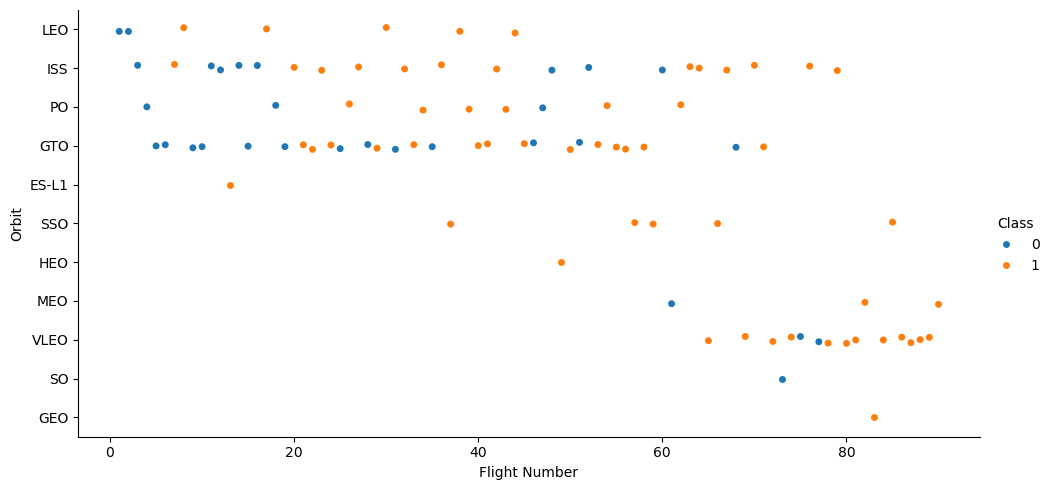

In [9]:
sns.catplot(y = "Orbit", x = "FlightNumber", hue = "Class", data = df, aspect = 2)
plt.xlabel("Flight Number",fontsize=10)
plt.ylabel("Orbit",fontsize=10)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### Visualize the relationship betwee Payload and Orbit type

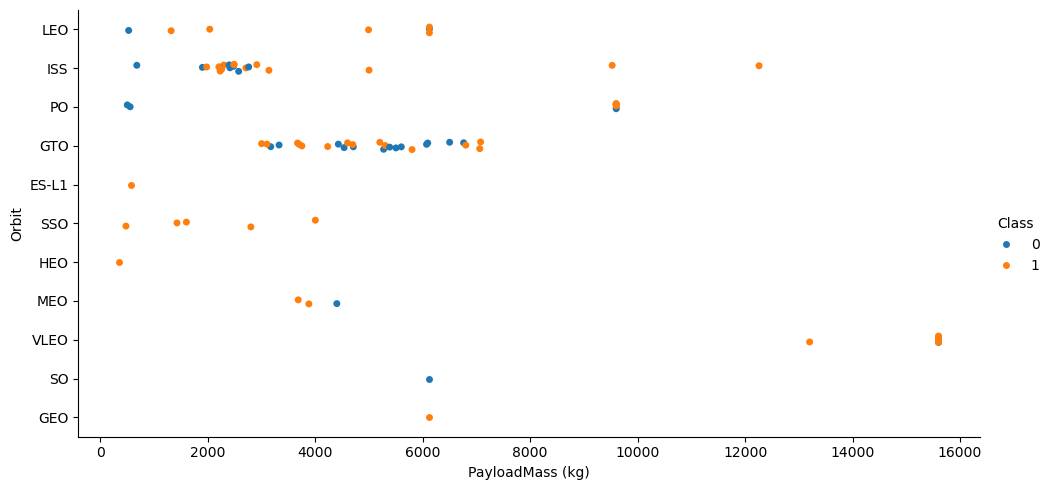

In [10]:
sns.catplot(y = "Orbit", x = "PayloadMass", hue = "Class", data = df , aspect = 2)
plt.xlabel("PayloadMass (kg)", fontsize = 10)
plt.ylabel("Orbit", fontsize = 10)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### Visualize the launch success yearly trend

In [11]:
df_copy = df.copy()
df_copy['Year'] = pd.DatetimeIndex(df_copy['Date']).year

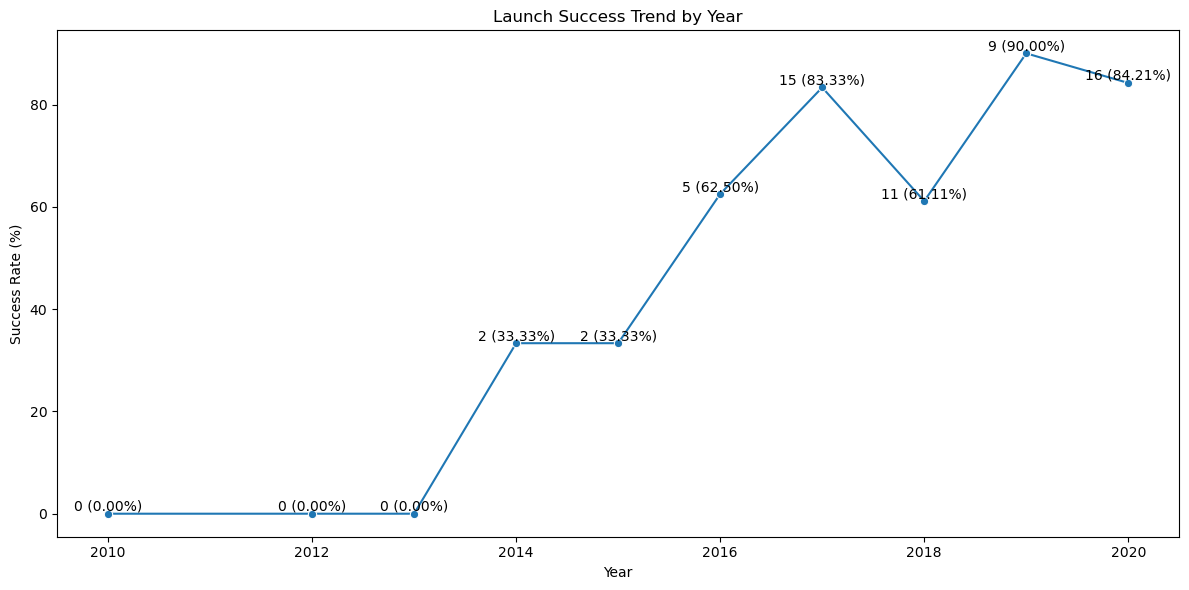

In [12]:
# Calculate the count of rows with Class = 1 and the success percentage
grouped = df_copy.groupby('Year')['Class'].agg(['sum', 'count'])
grouped['success_percentage'] = (grouped['sum'] / grouped['count']) * 100

# Create the line plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=grouped, x=grouped.index, y='success_percentage', marker='o')

# Add labels with success count and success percentage
for x_val, y_val, count in zip(grouped.index, grouped['success_percentage'], grouped['sum']):
    ax.text(x_val, y_val, f'{int(count)} ({y_val:.2f}%)', ha='center', va='bottom')

# Set titles and labels
plt.title('Launch Success Trend by Year')
plt.xlabel('Year')
plt.ylabel('Success Rate (%)')

# Display the plot
plt.tight_layout()
plt.show()


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.

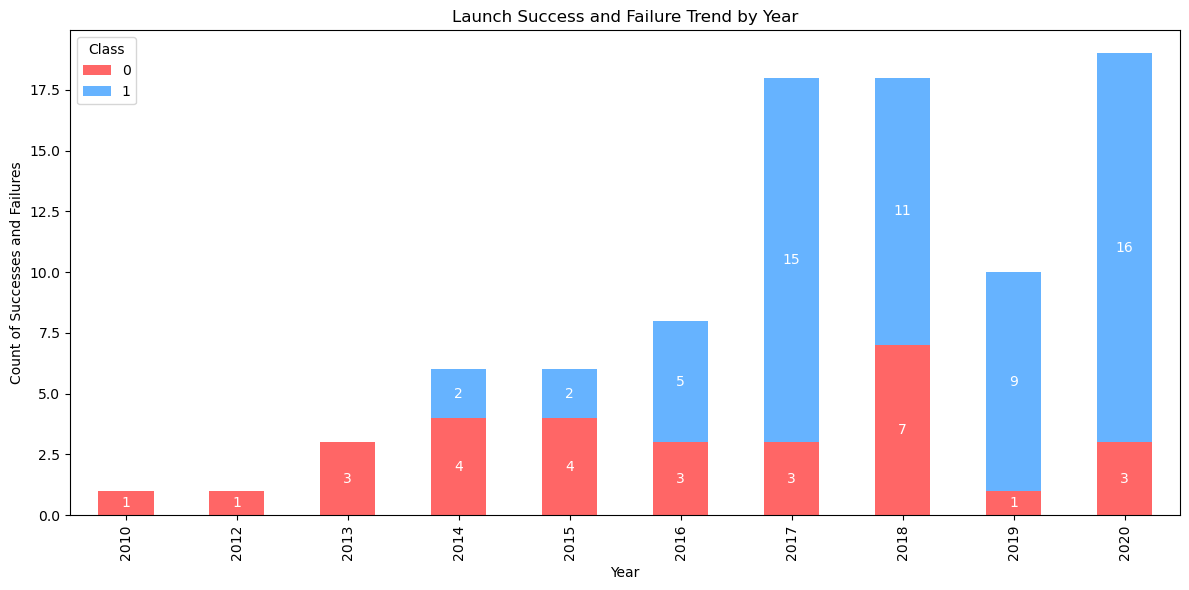

In [13]:
# Calculate the count of Class 0 and Class 1 per year
grouped = df_copy.groupby('Year')['Class'].value_counts().unstack(fill_value=0)

# Create the stacked bar plot
ax = grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=[ '#ff6666','#66b3ff'])

# Add labels for each bar, but only if the count is greater than 0
for p in ax.patches:
    height = p.get_height()  # Get the height of the section
    if height > 0:  # Only add a label if the height is greater than 0
        width = p.get_width()    # Get the width (not needed here but can be useful for positioning)
        x = p.get_x() + width / 2  # Get x position (center of the bar section)
        y = p.get_y() + height / 2  # Get y position (center of the bar section)
        
        # Add the label at the center of each section
        ax.text(x, y, f'{int(height)}', ha='center', va='center', fontsize=10, color='white')

# Set titles and labels
plt.title('Launch Success and Failure Trend by Year')
plt.xlabel('Year')
plt.ylabel('Count of Successes and Failures')

# Display the plot
plt.tight_layout()
plt.show()



### Exploratory Data Analysis using SQL

We will now perform some Exploratory Data Analysis (EDA) to find some patterns in the data

#### Connect to the database

Lets us first load the SQL extension and establish a connection with the database

In [15]:
# !pip install sqlalchemy pandas sqlite3

In [16]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///spacex.db')
df.to_sql('SPACEX_LANDING', con=engine, if_exists='replace', index=False)

90

Calculate the total payload mass (PayloadMass) for each `LaunchSite`, sorted by the highest payload mass.

In [17]:
query = '''
SELECT 
    LaunchSite, 
    ROUND(SUM(PayloadMass), 2) AS TotalPayloadMass
FROM SPACEX_LANDING
GROUP BY LaunchSite
ORDER BY TotalPayloadMass DESC
;
'''
result = pd.read_sql(query, con=engine)
result

,LaunchSite,TotalPayloadMass
0,CCSFS SLC 40,305987.19
1,KSC LC 39A,168179.10
2,VAFB SLC 4E,76953.00


Identify the launchSite with the highest average PayloadMass.

In [18]:
query = '''
SELECT 
  LaunchSite,
  ROUND(AVG(PayloadMass), 2) AS AvgPayloadMass
FROM SPACEX_LANDING
GROUP BY LaunchSite
ORDER BY AvgPayloadMass DESC
;
'''
result = pd.read_sql(query, con=engine)
result

,LaunchSite,AvgPayloadMass
0,KSC LC 39A,7644.50
1,VAFB SLC 4E,5919.46
2,CCSFS SLC 40,5563.40


List the FlightNumber and Date of flights that used grid fins (GridFins = TRUE) and had a payload mass between 9,000 kg and 15,000 kg.

In [19]:
query = '''
SELECT 
    FlightNumber, 
    Date, 
    PayloadMass
FROM SPACEX_LANDING
WHERE GridFins = TRUE 
AND PayloadMass between 9000 AND 15000
;
'''
result = pd.read_sql(query, con=engine)
result


,FlightNumber,Date,PayloadMass
0,26,2017-01-14,9600.0
1,34,2017-06-25,9600.0
2,39,2017-10-09,9600.0
3,43,2017-12-23,9600.0
4,47,2018-03-30,9600.0
5,54,2018-07-25,9600.0
6,62,2019-01-11,9600.0
7,63,2019-03-02,12259.0
8,65,2019-05-24,13200.0
9,79,2020-05-30,9525.0


Count how many rockets (Serial) had more than 3 successful landings (Class = 1).

In [20]:
query = '''
SELECT 
    Serial,
    COUNT(*) AS SuccessfulLandings
FROM SPACEX_LANDING
WHERE Class = 1
GROUP BY Serial
HAVING COUNT(*) > 3;
'''
result = pd.read_sql(query, con=engine)
result

,Serial,SuccessfulLandings
0,B1049,6
1,B1051,5
2,B1059,4


List the top 3 Orbit types with the highest average PayloadMass

In [21]:
query = '''
SELECT 
Orbit, 
ROUND(AVG(PayloadMass), 2) AS AvgPayloadMass
FROM SPACEX_LANDING
GROUP BY Orbit
ORDER BY AvgPayloadMass DESC
LIMIT 3;
'''
result = pd.read_sql(query, con=engine)
result

,Orbit,AvgPayloadMass
0,VLEO,15428.57
1,PO,7583.67
2,SO,6123.55


Retrieve the FlightNumber and Date for launches with a PayloadMass between 8,500 kg and 15,000 kg and class = 1

In [22]:
query = '''
SELECT 
    FlightNumber, 
    Date
FROM SPACEX_LANDING
WHERE PayloadMass BETWEEN 8500 AND 15000
AND class = 1 
'''
result = pd.read_sql(query, con=engine)
result


,FlightNumber,Date
0,26,2017-01-14
1,34,2017-06-25
2,39,2017-10-09
3,43,2017-12-23
4,54,2018-07-25
5,62,2019-01-11
6,63,2019-03-02
7,65,2019-05-24
8,79,2020-05-30


Calculate the total PayloadMass for successful launches (Outcome = 'Success') that used both grid fins and reused legs.

In [23]:
query = '''
SELECT 
    ROUND(SUM(PayloadMass),2) AS TotalPayloadMass
FROM SPACEX_LANDING
WHERE class = 1 
AND GridFins = TRUE 
AND Legs = TRUE; 
'''
result = pd.read_sql(query, con=engine)
result

,TotalPayloadMass
0,394133.34


Find the LaunchSite with the longest streak of successful landings (i.e., consecutive Class = 1 entries)

In [24]:
query = '''
WITH Streaks AS (
    SELECT 
        LaunchSite,
        Date,
        Class,
        CASE 
            WHEN Class = 1 THEN 
                ROW_NUMBER() OVER (PARTITION BY LaunchSite ORDER BY Date)
            ELSE 
                NULL
        END AS StreakID
    FROM SPACEX_LANDING
),
StreakGroups AS (
    SELECT 
        LaunchSite, 
        Date, 
        Class,
        SUM(CASE WHEN Class = 1 THEN 0 ELSE 1 END) OVER (PARTITION BY LaunchSite ORDER BY Date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS GroupID
    FROM Streaks
)
SELECT LaunchSite, MAX(StreakLength) AS LongestStreak
FROM (
    SELECT LaunchSite, GroupID, COUNT(*) AS StreakLength
    FROM StreakGroups
    WHERE Class = 1
    GROUP BY LaunchSite, GroupID
) AS StreakCounts
GROUP BY LaunchSite
ORDER BY LongestStreak DESC
LIMIT 1;
'''
result = pd.read_sql(query, con=engine)
result

,LaunchSite,LongestStreak
0,CCSFS SLC 40,9


Calculate the cumulative total PayloadMass for each LaunchSite as of each launch date (running total).

In [25]:
query = '''
SELECT 
       LaunchSite, 
       Date, 
      SUM(PayloadMass) OVER (PARTITION BY LaunchSite ORDER BY Date) AS CumulativePayloadMass
FROM SPACEX_LANDING
ORDER BY LaunchSite, Date;
'''
result = pd.read_sql(query, con=engine)
result

,LaunchSite,Date,CumulativePayloadMass
0,CCSFS SLC 40,2010-06-04,6123.547647
1,CCSFS SLC 40,2012-05-22,6648.547647
2,CCSFS SLC 40,2013-03-01,7325.547647
3,CCSFS SLC 40,2013-12-03,10495.547647
4,CCSFS SLC 40,2014-01-06,13820.547647
...,...,...,...
85,VAFB SLC 4E,2018-07-25,59128.000000
86,VAFB SLC 4E,2018-10-08,61928.000000
87,VAFB SLC 4E,2018-12-03,65928.000000
88,VAFB SLC 4E,2019-01-11,75528.000000


Identify the top 5 longest gap (in days) between two successful

In [26]:
query = '''
WITH RankedLaunches AS (
    SELECT 
        FlightNumber, 
        Date, 
        LaunchSite, 
        Class,
        LEAD(Date) OVER (ORDER BY Date) AS NextLaunchDate
    FROM SPACEX_LANDING
    WHERE Class = 1 
)

SELECT 
    Date AS StartDate,
    NextLaunchDate AS EndDate,
    JULIANDAY(NextLaunchDate) - JULIANDAY(Date) AS GapDays,
    ROUND((JULIANDAY(NextLaunchDate) - JULIANDAY(Date)) / 7 , 2 ) AS GapWeeks,   -- Gap en semanas
    ROUND((JULIANDAY(NextLaunchDate) - JULIANDAY(Date)) / 30, 2 ) AS GapMonths  -- Gap en meses (aproximado)
FROM RankedLaunches
WHERE NextLaunchDate IS NOT NULL 
ORDER BY GapDays DESC 
LIMIT 5;
'''
result = pd.read_sql(query, con=engine)
result

,StartDate,EndDate,GapDays,GapWeeks,GapMonths
0,2015-02-11,2015-12-22,314.0,44.86,10.47
1,2014-07-14,2015-02-11,212.0,30.29,7.07
2,2016-08-14,2017-01-14,153.0,21.86,5.10
3,2019-07-25,2019-11-11,109.0,15.57,3.63
4,2015-12-22,2016-04-08,108.0,15.43,3.60


 Find the most common LandingPad used in successful landings (Class = 1), but only considering landing pads that have been used at least 10 times

In [27]:
query = '''
SELECT 
    LandingPad, 
    COUNT(*) AS SuccessfulLandings
FROM SPACEX_LANDING
WHERE Class = 1
GROUP BY LandingPad
HAVING COUNT(*) >= 10
ORDER BY SuccessfulLandings DESC
LIMIT 1;
'''
result = pd.read_sql(query, con=engine)
result


,LandingPad,SuccessfulLandings
0,5e9e3032383ecb6bb234e7ca,30


### Feature Engineering

we identify and select the key features that could influence the success rate of a rocket launch. By analyzing the dataset, we extract variables that are likely to impact the prediction of landing success. These features are selected based on their relevance to the launch performance and outcomes.

### Selected Features:
- **`FlightNumber`**: Represents the chronological order of the flights, which could indicate improvements over time.
- **`PayloadMass`**: The mass of the payload being carried, which may impact the launch dynamics.
- **`Orbit`**: The target orbit, as different orbits may have varying levels of difficulty for successful landing.
- **`LaunchSite`**: The location of the launch, which could influence success due to environmental factors.
- **`Flights`**: The number of flights conducted by the rocket, indicating experience or wear.
- **`GridFins`**: Whether grid fins were used, which help control the rocket during descent.
- **`Reused`**: Whether the rocket was reused, as reused rockets may behave differently from new ones.
- **`Legs`**: Whether the rocket had landing legs, which are critical for successful ground landings.
- **`LandingPad`**: The type of landing pad used, which can affect the landing outcome.
- **`Block`**: The block version of the rocket, representing technological advancements.
- **`ReusedCount`**: The number of times the rocket has been reused, indicating its condition.
- **`Serial`**: The unique identifier for the rocket, which may help in identifying patterns associated with specific rockets.

In [29]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head(3)

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007


Apply One-Hot Encoding to Categorical Features

To prepare the data for machine learning models, we need to convert categorical variables into numerical representations. We achieve this by applying one-hot encoding to the categorical columns: `Orbit`, `LaunchSite`, `LandingPad`, and `Serial`. This technique creates binary columns for each unique category, enabling models to interpret categorical data.

In [30]:
# Setting this option will print all columns of a dataframe
pd.set_option('display.max_columns', None)


In [31]:
# Apply OneHotEncoder to categorical columns using get_dummies
features_one_hot = pd.get_dummies(features, drop_first=True)
features_one_hot.head(3)


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Save the result in a CSV file

In [ ]:
features_one_hot.to_csv(r'C:\Users\user\Desktop\Rocket-Landing-Success-ML\03-eda_and_feature_engineering\dataset_features_ML.csv')